In [6]:
# Import Required Librarires
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
import numpy as np
import zipfile
from tensorflow.keras.preprocessing import image

In [7]:
print('Tensorflow version ',tf.__version__)

Tensorflow version  2.19.0


In [8]:
tf.random.set_seed(42)

In [9]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2026-01-02 06:43:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   265MB/s    in 0.4s    

2026-01-02 06:43:10 (265 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [11]:
with zipfile.ZipFile('pizza_steak.zip','r') as zip_ref:
  zip_ref.extractall()

In [12]:
!ls pizza_steak

test  train


In [13]:
!ls pizza_steak/train/

pizza  steak


In [14]:
!ls pizza_steak/test/

pizza  steak


In [15]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [16]:
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [19]:
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),batch_size=32,class_mode='binary')

Found 1500 images belonging to 2 classes.


In [20]:
test_data=test_datagen.flow_from_directory(test_dir, target_size=(224,224),batch_size=32,class_mode='binary')

Found 500 images belonging to 2 classes.


In [21]:
#create Model and Add Layers
model=Sequential(
    [
        Conv2D(10,(3,3),activation='relu',input_shape=(224,224,3)),
        MaxPooling2D(),
        Conv2D(10,(3,3),activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(1,activation='sigmoid')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
#Compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        29,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,351 (118.56 KB)

 Trainable params: 30,351 (118.56 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Train the Model
history=model.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9312 - loss: 0.2028 - val_accuracy: 0.8360 - val_loss: 0.3632
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9610 - loss: 0.1333 - val_accuracy: 0.8520 - val_loss: 0.3584
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9823 - loss: 0.0998 - val_accuracy: 0.8220 - val_loss: 0.4445
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9767 - loss: 0.0867 - val_accuracy: 0.8420 - val_loss: 0.4136
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9940 - loss: 0.0536 - val_accuracy: 0.8460 - val_loss: 0.4390
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9971 - loss: 0.0432 - val_accuracy: 0.8220 - val_loss: 0.5130
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9983 - loss: 0.0366 - val_accuracy: 0.8440 - val_loss: 0.4959
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9991 - loss: 0.0184 - val_accuracy: 0.

In [27]:
#Evaluate the Model
loss,accuracy=model.evaluate(test_data)
print('Loss: ',loss)
print('Accuracy: ',accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.8621 - loss: 0.4838
Loss:  0.5569760799407959
Accuracy:  0.8479999899864197


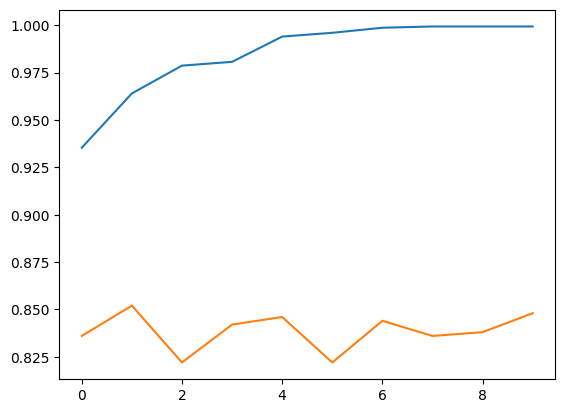

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


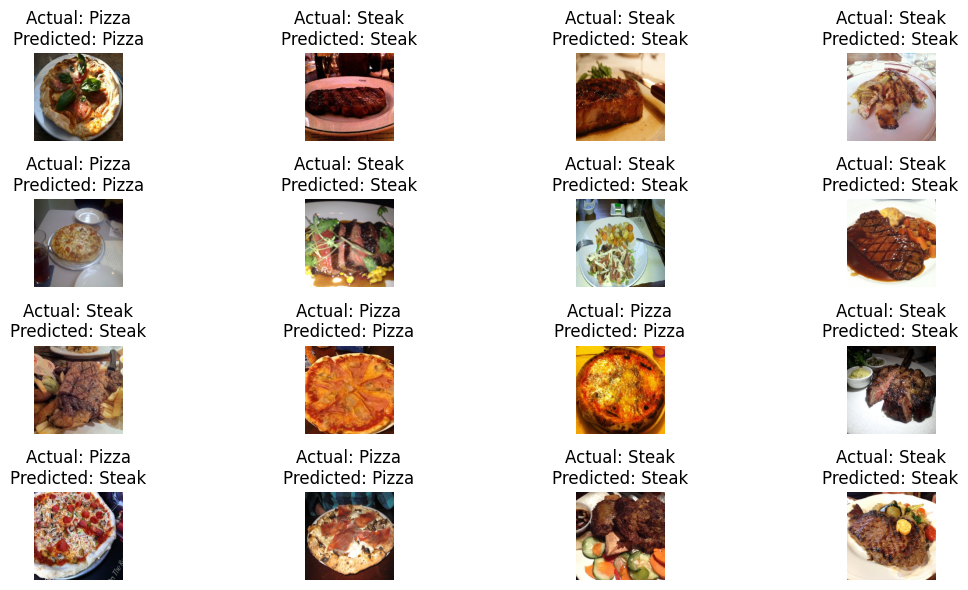

In [34]:
images,labels=next(test_data)
predictions=model.predict(images)
plt.figure(figsize=(12,6))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(images[i])
  plt.axis('off')
  true_label='Pizza' if labels[i]==0 else 'Steak'
  pred_label='Pizza' if predictions[i]<0.5 else 'Steak'
  plt.title(f'Actual: {true_label}\nPredicted: {pred_label}')

plt.tight_layout()
plt.show()



Saving p-2.jpg to p-2.jpg
Image Uploaded @:  /content/p-2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


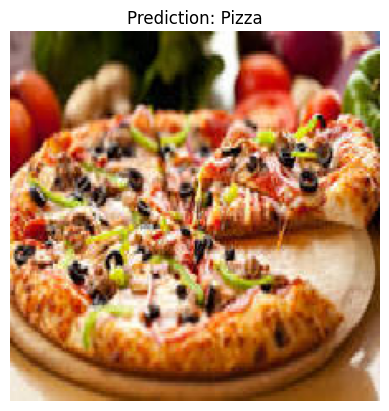

In [40]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  img_path='/content/'+fn
  print('Image Uploaded @: ',img_path)
  img=image.load_img(img_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array/=255.0
  prediction=model.predict(img_array)[0][0]
  label='Pizza' if prediction<0.5 else 'Steak'
  plt.imshow(img)
  plt.title(f'Prediction: {label}')
  plt.axis('off')
  plt.show()

### Build a CNN using TensorFlow & Keras using following dataset
* !wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip
  
* !wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip
* Train on rock,paper, scissors images
* Evaluate model Perfomance
* Visualize True(Actual) Vs Predicted(given by Modle) results in subplots
* Test for 3 different new images

In [56]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip


--2026-01-02 08:36:13--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   121MB/s    in 1.6s    

2026-01-02 08:36:14 (121 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2026-01-02 08:36:14--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-t